In [1]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('data_flats.csv', sep=';')
data.head()

In [ ]:
list(data.sub_area.value_counts().index)

In [2]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [3]:
vis_data.info()
vis_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

ticket_id                                     agency_name  \
0      22056  Buildings, Safety Engineering & Env Department   
1      27586  Buildings, Safety Engineering & Env Department   
2      22062  Buildings, Safety Engineering & Env Department   
3      22084  Buildings, Safety Engineering & Env Department   
4      22093  Buildings, Safety Engineering & Env Department   
5      22046  Buildings, Safety Engineering & Env Department   
6      18738  Buildings, Safety Engineering & Env Department   
7      18735  Buildings, Safety Engineering & Env Department   
8      18733  Buildings, Safety Engineering & Env Department   
9      28204  Buildings, Safety Engineering & Env Department   

     inspector_name                         violator_name  \
0   Sims, Martinzie     INVESTMENT INC., MIDWEST MORTGAGE   
1  Williams, Darrin              Michigan, Covenant House   
2   Sims, Martinzie                       SANDERS, DERRON   
3   Sims, Martinzie                          MOROSI, MIKE   
4   Sims, Martinzie                       NATHANIEL, NEAL   
5   Sims, Martinzie                        KASIMU, UKWELI   
6  Williams, Darrin  Deerwood Development Group Inc, Deer   
7  Williams, Darrin       Rafee Auto Services L.L.C., RAF   
8  Williams, Darrin       Rafee Auto Services L.L.C., RAF   
9  Williams, Darrin                            Inc, Nanno   

   violation_street_number violation_street_name  violation_zip_code  \
0                   2900.0                 TYLER                 NaN   
1                   4311.0               CENTRAL                 NaN   
2                   1449.0            LONGFELLOW                 NaN   
3                   1441.0            LONGFELLOW                 NaN   
4                   2449.0             CHURCHILL                 NaN   
5                   6478.0            NORTHFIELD                 NaN   
6                   8027.0             BRENTWOOD                 NaN   
7                   8228.0            MT ELLIOTT                 NaN   
8                   8228.0            MT ELLIOTT                 NaN   
9                  15307.0            SEVEN MILE                 NaN   

   mailing_address_str_number mailing_address_str_name       city  ...  \
0                         3.0                S. WICKER    CHICAGO  ...   
1                      2959.0       Martin Luther King    Detroit  ...   
2                     23658.0                 P.O. BOX    DETROIT  ...   
3                         5.0                ST. CLAIR    DETROIT  ...   
4                      7449.0                CHURCHILL    DETROIT  ...   
5                      2755.0                  E. 17TH  LOG BEACH  ...   
6                       476.0                 Garfield    Clinton  ...   
7                      8228.0              Mt. Elliott    Detroit  ...   
8                      8228.0              Mt. Elliott    Detroit  ...   
9                      1537.0            E. Seven Mile    Detroit  ...   

  clean_up_cost judgment_amount payment_amount balance_due  \
0           0.0           305.0            0.0       305.0   
1           0.0           855.0          780.0        75.0   
2           0.0             0.0            0.0         0.0   
3           0.0             0.0            0.0         0.0   
4           0.0             0.0            0.0         0.0   
5           0.0           305.0            0.0       305.0   
6           0.0           855.0            0.0       855.0   
7           0.0           140.0            0.0       140.0   
8           0.0           140.0            0.0       140.0   
9           0.0           855.0            0.0       855.0   

          payment_date      payment_status collection_status grafitti_status  \
0                  NaN  NO PAYMENT APPLIED               NaN             NaN   
1  2005-06-02 00:00:00        PAID IN FULL               NaN             NaN   
2                  NaN  NO PAYMENT APPLIED               NaN             NaN   
3              

In [ ]:
state_max = list(vis_data.state.value_counts().head(1).index)

In [ ]:
result = vis_data.state.fillna(state_max[0])

In [ ]:
result

In [ ]:
data.dropna(axis=0)

In [ ]:
balance = np.array(vis_data.balance_due).reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(balance).min()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(balance).min()

In [ ]:
np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).hist()

In [ ]:
median_balance = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).median()
mean_balance = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).mean()
abs(median_balance - mean_balance)

In [ ]:
import seaborn as sns

In [ ]:
price = data[['sub_area', 'price_doc']].loc[(data.sub_area=='Perovo')|(data.sub_area=='Basmannoe')|
                                            (data.sub_area=='Lefortovo')|(data.sub_area=='Bogorodskoe')]
sns.boxplot(x="sub_area", y="price_doc", data=price, palette='rainbow');

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data[['balance_due', 'payment_amount']])

In [ ]:
np.mean(poly_features, axis=0)

In [ ]:
dt_issued_date = pd.to_datetime(vis_data.ticket_issued_date)
vis_data['is_weekend'] = dt_issued_date.dt.weekday > 4
vis_data['is_weekend'].value_counts()

In [ ]:
data.ecology.value_counts()

In [ ]:
ecology_dict = {'no data':0, 'poor':1, 'satisfactory':2, 'good':3, 'excellent':4}

In [ ]:
data.ecology = data.ecology.replace(to_replace=ecology_dict)
data.ecology.value_counts()

In [ ]:
data.ecology.mean()

In [ ]:
data.sub_area.value_counts()

In [ ]:
pd.get_dummies(data.sub_area, drop_first=True)

In [ ]:
data

In [4]:
import seaborn as sns

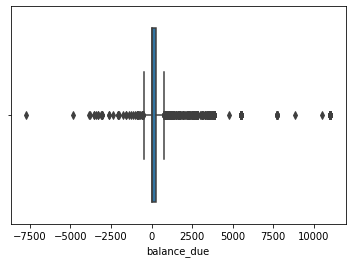

In [5]:
sns.boxplot(vis_data.balance_due)

In [24]:
def out_balance(balance):
    quartile_1, quartile_3 = np.percentile(balance, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return balance.loc[(balance > upper_bound) | (balance < lower_bound)]

In [25]:
o = out_balance(vis_data.balance_due.dropna())

In [27]:
abs(o.min() - o.max())

18780.0